In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.dates import YearLocator, MonthLocator

In [76]:
raw = pd.read_csv('./data/tr_eikon_eod_data.csv', 
                  index_col=0, parse_dates=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [77]:
selected = ['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N']

In [78]:
data = pd.DataFrame(raw[selected].dropna())
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Date,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08
2010-01-05,30.625684,30.960,20.87,134.69,176.14
2010-01-06,30.138541,30.770,20.80,132.25,174.26
2010-01-07,30.082827,30.452,20.60,130.00,177.67
2010-01-08,30.282827,30.660,20.83,133.52,174.31
...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54
2018-06-26,184.430000,99.080,49.67,1691.09,221.58
2018-06-27,184.160000,97.540,48.76,1660.51,220.18


In [79]:
for stock in selected:
    data['Returns_' + stock] = np.log(data[stock] / data[stock].shift(1)).dropna()
    data['Returns_' + stock].fillna(0, inplace=True)
data

/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_5840/2098642776.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Returns_' + stock].fillna(0, inplace=True)
/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_5840/2098642776.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,Returns_AAPL.O,Returns_MSFT.O,Returns_INTC.O,Returns_AMZN.O,Returns_GS.N
Date,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,30.625684,30.960,20.87,134.69,176.14,0.001727,0.000323,-0.000479,0.005883,0.017525
2010-01-06,30.138541,30.770,20.80,132.25,174.26,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731
2010-01-07,30.082827,30.452,20.60,130.00,177.67,-0.001850,-0.010389,-0.009662,-0.017160,0.019379
2010-01-08,30.282827,30.660,20.83,133.52,174.31,0.006626,0.006807,0.011103,0.026717,-0.019093
...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54,-0.014983,-0.020323,-0.034690,-0.031090,-0.020020
2018-06-26,184.430000,99.080,49.67,1691.09,221.58,0.012330,0.006988,-0.020722,0.016660,0.000181
2018-06-27,184.160000,97.540,48.76,1660.51,220.18,-0.001465,-0.015665,-0.018491,-0.018249,-0.006338


In [80]:
for stock in selected:
    data['direction_' + stock] = np.sign(data['Returns_' + stock]).dropna().astype(int)
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,Returns_AAPL.O,Returns_MSFT.O,Returns_INTC.O,Returns_AMZN.O,Returns_GS.N,direction_AAPL.O,direction_MSFT.O,direction_INTC.O,direction_AMZN.O,direction_GS.N
Date,,,,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0
2010-01-05,30.625684,30.960,20.87,134.69,176.14,0.001727,0.000323,-0.000479,0.005883,0.017525,1,1,-1,1,1
2010-01-06,30.138541,30.770,20.80,132.25,174.26,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731,-1,-1,-1,-1,-1
2010-01-07,30.082827,30.452,20.60,130.00,177.67,-0.001850,-0.010389,-0.009662,-0.017160,0.019379,-1,-1,-1,-1,1
2010-01-08,30.282827,30.660,20.83,133.52,174.31,0.006626,0.006807,0.011103,0.026717,-0.019093,1,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54,-0.014983,-0.020323,-0.034690,-0.031090,-0.020020,-1,-1,-1,-1,-1
2018-06-26,184.430000,99.080,49.67,1691.09,221.58,0.012330,0.006988,-0.020722,0.016660,0.000181,1,1,-1,1,1
2018-06-27,184.160000,97.540,48.76,1660.51,220.18,-0.001465,-0.015665,-0.018491,-0.018249,-0.006338,-1,-1,-1,-1,-1


In [115]:
split = int(len(data)*0.8)
data_train = data.iloc[:split].copy()
data_test = data.iloc[split:].copy()

In [116]:
rets_train = np.concatenate([data_train['Returns_' + stock].values.reshape(-1,1) for stock in selected])

In [83]:
def train_hmm(data, n_iter=500):
    best_model = None
    best_score = float('-inf')
    
    for _ in range(n_iter):
        model = GaussianHMM(n_components=2, covariance_type="full", n_iter=1000)
        model.fit(data)
        score = model.score(data)
        if score > best_score:
            best_score = score
            best_model = model
    
    return best_model

In [84]:
rets_test = np.concatenate([data_test['Returns_' + stock].values.reshape(-1,1) for stock in selected])

In [85]:
model = train_hmm(rets_train)

Model is not converging.  Current: 23521.186553451327 is not greater than 23521.19097736248. Delta is -0.004423911152116489
Model is not converging.  Current: 23521.443212230773 is not greater than 23521.443472608305. Delta is -0.0002603775319585111
Model is not converging.  Current: 23521.451543301886 is not greater than 23521.457887972207. Delta is -0.0063446703206864186


In [86]:
hidden_states_train = model.predict(rets_train)

In [93]:
model.means_

array([[ 0.00092118],
       [-0.00137781]])

In [94]:
def generate_trading_signals(hidden_states):
    signals = np.zeros(len(hidden_states))
    for i in range(1, len(hidden_states)):
        if model.means_[hidden_states[i]] == model.means_.max():
            signals[i] = 1
        else:
            signals[i] = -1
    return signals

In [87]:
def generate_trading_signals(hidden_states):
    signals = np.zeros(len(hidden_states))
    for i in range(1, len(hidden_states)):
        if hidden_states[i] > hidden_states[i-1]:
            signals[i] = 1  # Buy signal
        elif hidden_states[i] < hidden_states[i-1]:
            signals[i] = -1  # Sell signal
        else:
            signals[i] = signals[i-1]
    return signals

In [95]:
trading_signals_train = generate_trading_signals(hidden_states_train)

In [96]:
split_trading_signals_train = np.array_split(trading_signals_train, 5)
for i in range(len(selected)):
    data_train['Signal_' + selected[i]] = split_trading_signals_train[i]

In [97]:
for stock in selected:
    data_train['Returns_HMM2_' + stock] = data_train['Signal_' + stock] * data_train['Returns_' + stock]
data_train

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,Returns_AAPL.O,Returns_MSFT.O,Returns_INTC.O,Returns_AMZN.O,Returns_GS.N,...,Signal_AAPL.O,Signal_MSFT.O,Signal_INTC.O,Signal_AMZN.O,Signal_GS.N,Returns_HMM2_AAPL.O,Returns_HMM2_MSFT.O,Returns_HMM2_INTC.O,Returns_HMM2_AMZN.O,Returns_HMM2_GS.N
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,30.625684,30.960,20.87,134.69,176.14,0.001727,0.000323,-0.000479,0.005883,0.017525,...,1.0,1.0,1.0,1.0,1.0,0.001727,0.000323,-0.000479,0.005883,0.017525
2010-01-06,30.138541,30.770,20.80,132.25,174.26,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731,...,1.0,1.0,1.0,1.0,1.0,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731
2010-01-07,30.082827,30.452,20.60,130.00,177.67,-0.001850,-0.010389,-0.009662,-0.017160,0.019379,...,1.0,1.0,1.0,1.0,1.0,-0.001850,-0.010389,-0.009662,-0.017160,0.019379
2010-01-08,30.282827,30.660,20.83,133.52,174.31,0.006626,0.006807,0.011103,0.026717,-0.019093,...,1.0,1.0,1.0,1.0,1.0,0.006626,0.006807,0.011103,0.026717,-0.019093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-11,116.300000,57.190,37.27,831.00,169.04,0.002152,-0.014753,-0.019924,-0.012806,-0.011762,...,1.0,1.0,1.0,1.0,1.0,0.002152,-0.014753,-0.019924,-0.012806,-0.011762
2016-10-12,117.340000,57.110,37.13,834.09,169.30,0.008903,-0.001400,-0.003763,0.003712,0.001537,...,1.0,1.0,1.0,1.0,1.0,0.008903,-0.001400,-0.003763,0.003712,0.001537
2016-10-13,116.980000,56.920,36.97,829.28,167.42,-0.003073,-0.003332,-0.004318,-0.005783,-0.011167,...,1.0,1.0,1.0,1.0,1.0,-0.003073,-0.003332,-0.004318,-0.005783,-0.011167


In [98]:
for stock in selected:
    print(data_train[['Returns_' + stock, 'Returns_HMM2_' + stock]].sum().apply(np.exp))

Returns_AAPL.O         3.844918
Returns_HMM2_AAPL.O    8.438730
dtype: float64
Returns_MSFT.O         1.848788
Returns_HMM2_MSFT.O    2.513354
dtype: float64
Returns_INTC.O         1.785920
Returns_HMM2_INTC.O    4.869222
dtype: float64
Returns_AMZN.O         6.071322
Returns_HMM2_AMZN.O    3.797618
dtype: float64
Returns_GS.N         0.976427
Returns_HMM2_GS.N    5.936542
dtype: float64


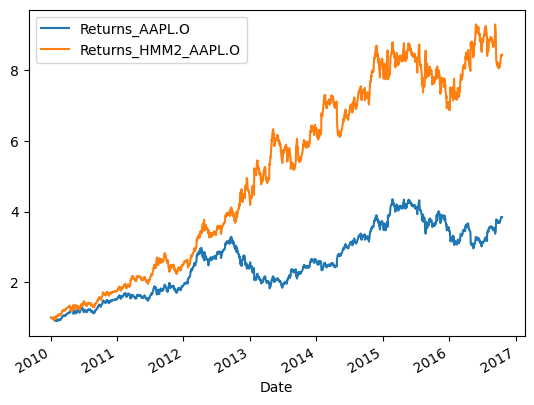

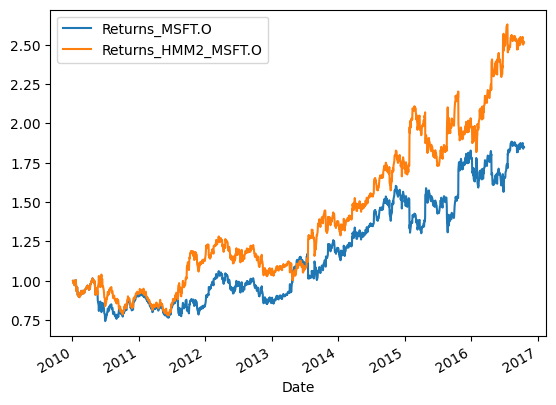

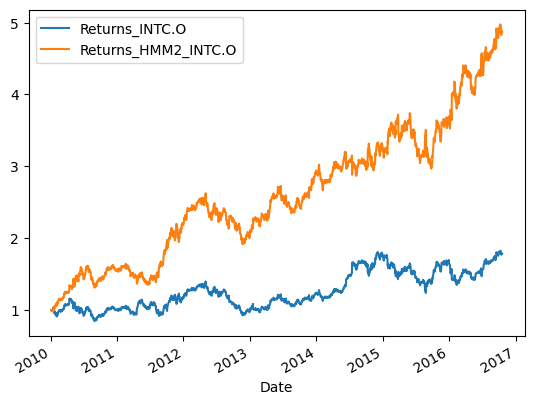

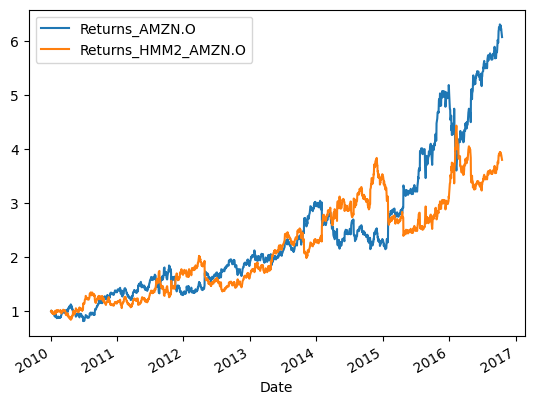

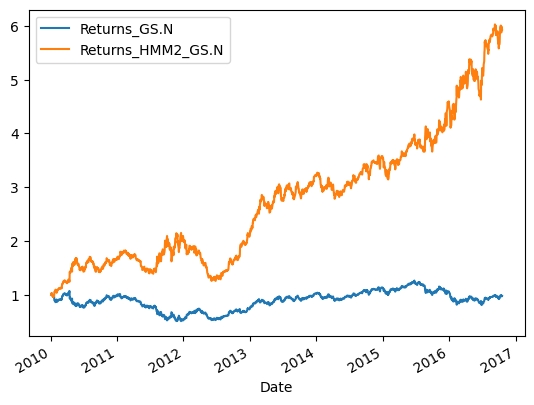

In [99]:
for stock in selected:
    data_train[['Returns_' + stock, 'Returns_HMM2_' + stock]].cumsum().apply(np.exp).plot()

In [112]:
print(len(data_train))

for stock in selected:
    print((data_train['Signal_' + stock] != data_train['direction_' + stock]).sum())

1710
799
839
819
830
811


In [106]:
hidden_states_test = model.predict(rets_test)

In [107]:
trading_signals_test = generate_trading_signals(hidden_states_test)

In [108]:
split_trading_signals_test = np.array_split(trading_signals_test, 5)
for i in range(len(selected)):
    data_test['Signal_' + selected[i]] = split_trading_signals_test[i]

In [109]:
for stock in selected:
    data_test['Returns_HMM2_' + stock] = data_test['Signal_' + stock] * data_test['Returns_' + stock]
data_test

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,Returns_AAPL.O,Returns_MSFT.O,Returns_INTC.O,Returns_AMZN.O,Returns_GS.N,...,Signal_AAPL.O,Returns_HMM2_AAPL.O,Signal_MSFT.O,Returns_HMM2_MSFT.O,Signal_INTC.O,Returns_HMM2_INTC.O,Signal_AMZN.O,Returns_HMM2_AMZN.O,Signal_GS.N,Returns_HMM2_GS.N
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-18,117.47,57.66,37.75,817.65,172.63,-0.000681,0.007660,0.012260,0.005765,0.021252,...,0.0,-0.000000,1.0,0.007660,1.0,0.012260,1.0,0.005765,1.0,0.021252
2016-10-19,117.12,57.53,35.51,817.69,174.51,-0.002984,-0.002257,-0.061171,0.000049,0.010831,...,1.0,-0.002984,1.0,-0.002257,-1.0,0.061171,1.0,0.000049,1.0,0.010831
2016-10-20,117.06,57.25,35.43,810.32,174.51,-0.000512,-0.004879,-0.002255,-0.009054,0.000000,...,1.0,-0.000512,1.0,-0.004879,1.0,-0.002255,1.0,-0.009054,1.0,0.000000
2016-10-21,116.60,59.66,35.15,818.99,174.67,-0.003937,0.041234,-0.007934,0.010643,0.000916,...,1.0,-0.003937,1.0,0.041234,1.0,-0.007934,1.0,0.010643,1.0,0.000916
2016-10-24,117.65,61.00,35.26,838.09,175.12,0.008965,0.022212,0.003125,0.023054,0.002573,...,1.0,0.008965,1.0,0.022212,1.0,0.003125,1.0,0.023054,1.0,0.002573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.17,98.39,50.71,1663.15,221.54,-0.014983,-0.020323,-0.034690,-0.031090,-0.020020,...,1.0,-0.014983,1.0,-0.020323,1.0,-0.034690,1.0,-0.031090,1.0,-0.020020
2018-06-26,184.43,99.08,49.67,1691.09,221.58,0.012330,0.006988,-0.020722,0.016660,0.000181,...,1.0,0.012330,1.0,0.006988,1.0,-0.020722,1.0,0.016660,1.0,0.000181
2018-06-27,184.16,97.54,48.76,1660.51,220.18,-0.001465,-0.015665,-0.018491,-0.018249,-0.006338,...,1.0,-0.001465,1.0,-0.015665,1.0,-0.018491,1.0,-0.018249,1.0,-0.006338


In [110]:
for stock in selected:
    print(data_test[['Returns_' + stock, 'Returns_HMM2_' + stock]].sum().apply(np.exp))

Returns_AAPL.O         1.574734
Returns_HMM2_AAPL.O    1.335501
dtype: float64
Returns_MSFT.O         1.723348
Returns_HMM2_MSFT.O    1.744687
dtype: float64
Returns_INTC.O         1.333065
Returns_HMM2_INTC.O    0.938779
dtype: float64
Returns_AMZN.O         2.090903
Returns_HMM2_AMZN.O    2.000501
dtype: float64
Returns_GS.N         1.305148
Returns_HMM2_GS.N    1.551530
dtype: float64


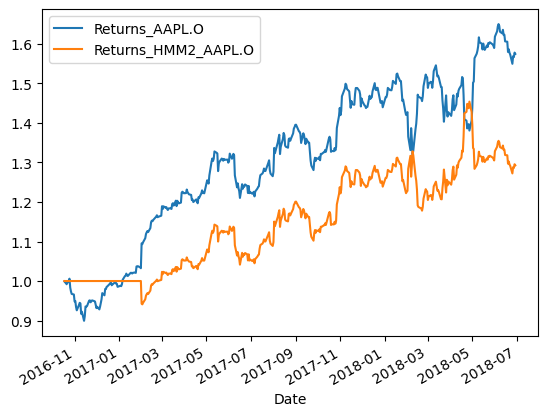

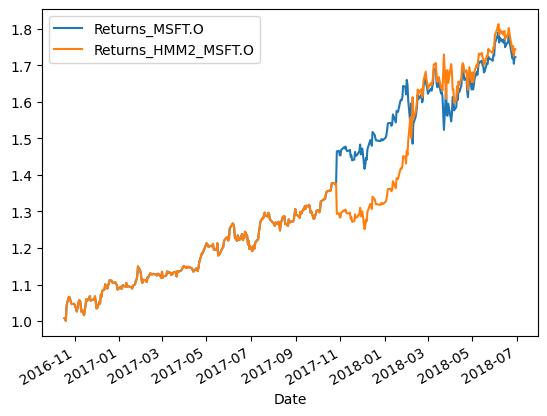

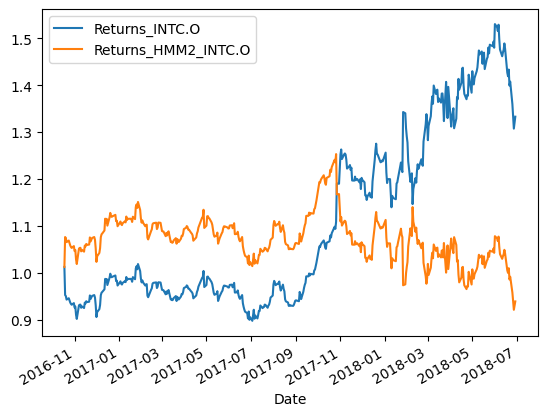

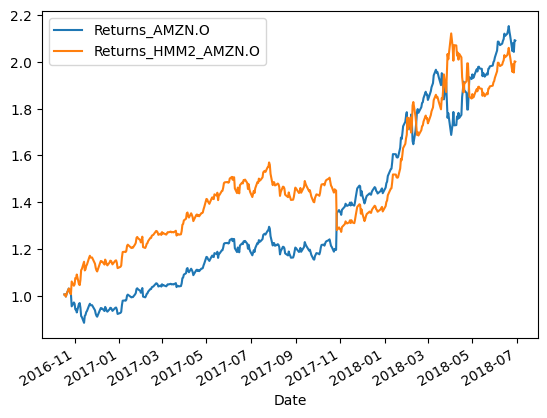

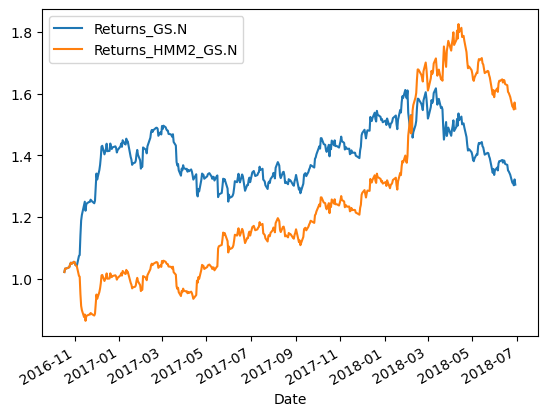

In [73]:
for stock in selected:
    data_test[['Returns_' + stock, 'Returns_HMM2_' + stock]].cumsum().apply(np.exp).plot()

In [113]:
print(len(data_test))

for stock in selected:
    print((data_test['Signal_' + stock] != data_test['direction_' + stock]).sum())

428
206
197
200
186
210


In [114]:
for stock in selected:
    test_data = np.concatenate([data_train['Returns_' + stock].values.reshape(-1,1)])
    hidden_states_test = model.predict(test_data)
    trading_signals_test = generate_trading_signals(hidden_states_test)
    data_test['Signal_' + stock] = trading_signals_test
    data_test['Returns_HMM2_' + stock] = data_test['Signal_' + stock] * data_test['Returns_' + stock]

ValueError: Length of values (1710) does not match length of index (428)